# Customer Churn Prediction Analysis

# Exploratory Data Analysis

In [1]:
# Importing Required Library

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [3]:
df = pd.read_csv("SAI_LINGESH.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [6]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,500.50000,288.819436,1.0,250.7500,500.50,750.2500,1000.00
Age,1000.0,44.67400,9.797741,12.0,38.0000,45.00,51.0000,83.00
Tenure,1000.0,18.97300,18.892570,0.0,5.0000,13.00,26.0000,122.00
MonthlyCharges,1000.0,74.39129,25.712083,30.0,52.3575,74.06,96.1025,119.96
TotalCharges,1000.0,1404.36406,1571.755048,0.0,345.2175,872.87,1900.1750,12416.25


In [9]:
numerical_columns_data = df.select_dtypes(include = ["number"])

In [10]:
print(numerical_columns_data.corr())

                CustomerID       Age    Tenure  MonthlyCharges  TotalCharges
CustomerID        1.000000  0.036730 -0.018585       -0.030504     -0.027490
Age               0.036730  1.000000  0.000472        0.006362     -0.001896
Tenure           -0.018585  0.000472  1.000000       -0.014552      0.894868
MonthlyCharges   -0.030504  0.006362 -0.014552        1.000000      0.304893
TotalCharges     -0.027490 -0.001896  0.894868        0.304893      1.000000


In [11]:
# -1 : Strong Negative Correlation
# 1 : Strong Positive Correlation

# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

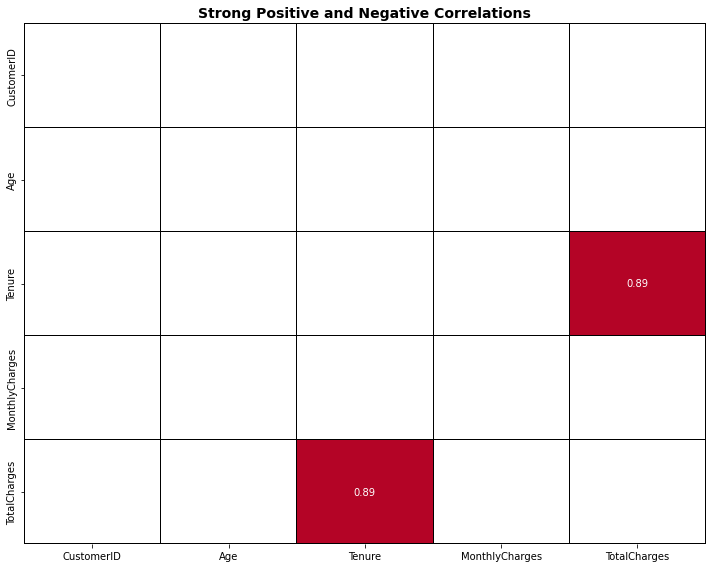

In [13]:
corr_matrix = numerical_columns_data.corr()

# Filter for strong correlations (positive > 0.7 or negative < -0.7)
strong_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]

# Remove the diagonal (set it to NaN)
for i in range(len(strong_corr)):
    strong_corr.iloc[i, i] = None

plt.figure(figsize = (10, 8))
sns.heatmap(
    strong_corr, 
    annot = True, 
    fmt = ".2f", 
    cmap = "coolwarm", 
    center = 0, 
    linewidths = 0.01, 
    linecolor = "black", 
    cbar = False
)

plt.title("Strong Positive and Negative Correlations", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

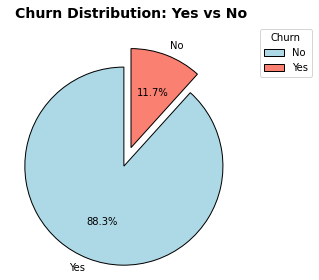

In [14]:
df["Churn"].value_counts().plot(
    kind = "pie", 
    autopct = '%1.1f%%',
    startangle = 90,
    colors = ["lightblue", "salmon"],
    wedgeprops = {'edgecolor': 'black'},
    explode = [0.2, 0]
)

plt.title("Churn Distribution: Yes vs No", fontsize = 14, fontweight = "bold")
plt.ylabel("")
plt.legend(["No", "Yes"], title = "Churn", bbox_to_anchor = (1, 1), loc = "upper left")  
plt.tight_layout()
plt.show()

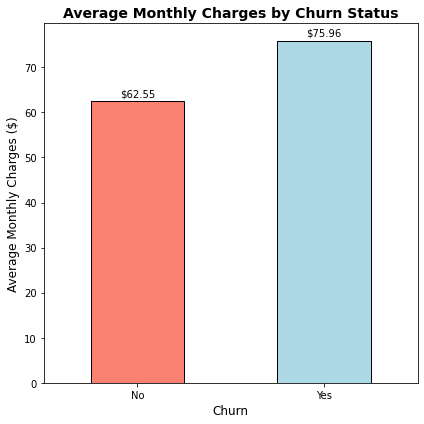

In [15]:
mean_charges = df.groupby("Churn")["MonthlyCharges"].mean()

mean_charges.plot(
    kind = "bar", 
    color = ["salmon", "lightblue"],
    edgecolor = "black",
    figsize = (6, 6)
)

plt.title("Average Monthly Charges by Churn Status", fontsize = 14, fontweight = "bold")
plt.xlabel("Churn", fontsize = 12)
plt.ylabel("Average Monthly Charges ($)", fontsize = 12)

for i, value in enumerate(mean_charges):
    plt.text(i, value + 1, f"${value:.2f}", ha = "center", fontsize = 10, color = "black")

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

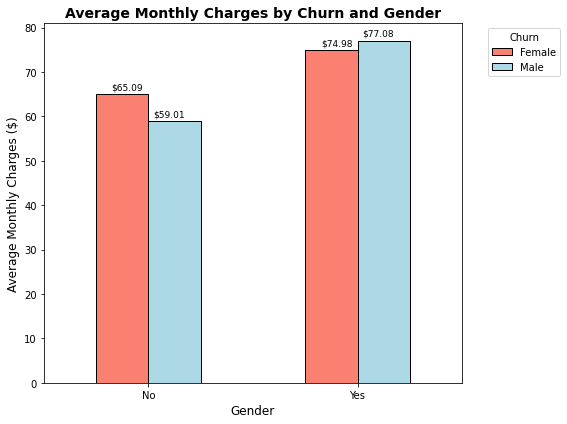

In [16]:
mean_charges = df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean().unstack()

mean_charges.plot(
    kind = "bar", 
    color = ["salmon", "lightblue"], 
    edgecolor = "black", 
    figsize = (8, 6)
)

plt.title("Average Monthly Charges by Churn and Gender", fontsize = 14, fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Average Monthly Charges ($)", fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = "Churn", bbox_to_anchor = (1.05, 1), loc = "upper left")

for i in range(len(mean_charges)):
    for j, value in enumerate(mean_charges.iloc[i]):
        plt.text(
            i + (j - 0.5) * 0.2, 
            value + 1, 
            f"${value:.2f}", 
            ha = "center", 
            fontsize = 9, 
            color = "black"
        )

plt.tight_layout()
plt.show()

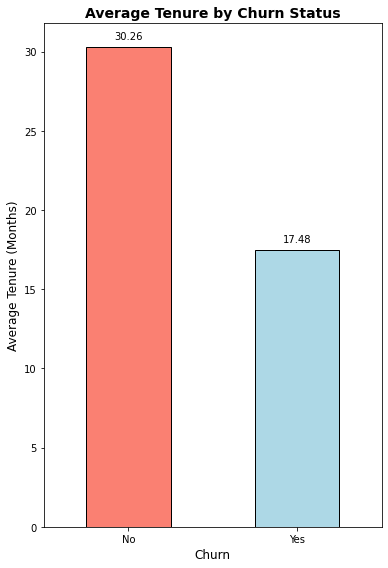

In [17]:
mean_tenure = df.groupby("Churn")["Tenure"].mean()

mean_tenure.plot(
    kind = "bar", 
    color = ["salmon", "lightblue"], 
    edgecolor = "black", 
    figsize = (5.5, 8)
)

plt.title("Average Tenure by Churn Status", fontsize = 14, fontweight = "bold")
plt.xlabel("Churn", fontsize = 12)
plt.ylabel("Average Tenure (Months)", fontsize = 12)
plt.xticks(rotation = 0)

for i, value in enumerate(mean_tenure):
    plt.text(i, value + 0.5, f"{value:.2f}", ha = "center", fontsize = 10, color = "black")

plt.tight_layout()
plt.show()

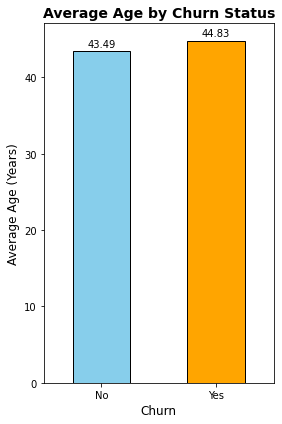

In [18]:
mean_age = df.groupby("Churn")["Age"].mean()

mean_age.plot(
    kind = "bar", 
    color = ["skyblue", "orange"], 
    edgecolor = "black", 
    figsize = (4, 6)
)

plt.title("Average Age by Churn Status", fontsize = 14, fontweight = "bold")
plt.xlabel("Churn", fontsize = 12)
plt.ylabel("Average Age (Years)", fontsize = 12)
plt.xticks(rotation = 0)

for i, value in enumerate(mean_age):
    plt.text(i, value + 0.5, f"{value:.2f}", ha = "center", fontsize = 10, color = "black")

plt.tight_layout()
plt.show()

In [19]:
# At lower the terms we can see that the monthly charge average decreases.

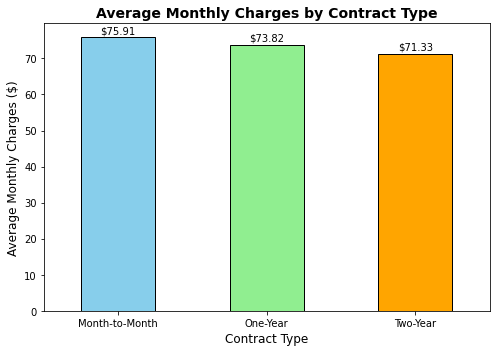

In [20]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(
    kind = "bar", 
    color = ["skyblue", "lightgreen", "orange"], 
    edgecolor = "black", 
    figsize = (7, 5)
)

plt.title("Average Monthly Charges by Contract Type", fontsize = 14, fontweight = "bold")
plt.ylabel("Average Monthly Charges ($)", fontsize = 12)
plt.xlabel("Contract Type", fontsize = 12)
plt.xticks(rotation = 0)

for i, value in enumerate(df.groupby("ContractType")["MonthlyCharges"].mean()):
    plt.text(i, value + 1, f"${value:.2f}", ha = "center", fontsize = 10, color = "black")

plt.tight_layout()
plt.show()

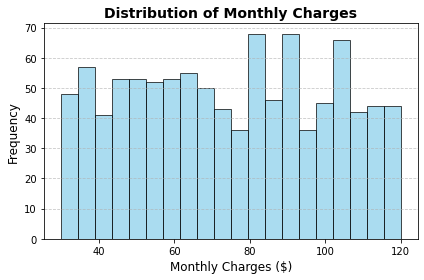

In [21]:
plt.hist(df["MonthlyCharges"], bins = 20, color = "skyblue", edgecolor = "black", alpha = 0.7)
plt.title("Distribution of Monthly Charges", fontsize = 14, fontweight = "bold")
plt.xlabel("Monthly Charges ($)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

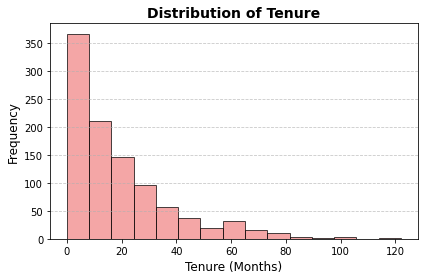

In [22]:
plt.hist(df["Tenure"], bins = 15, color = "lightcoral", edgecolor = "black", alpha = 0.7)
plt.title("Distribution of Tenure", fontsize = 14, fontweight = "bold")
plt.xlabel("Tenure (Months)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.grid(axis = "y", linestyle="--", alpha = 0.7)
plt.tight_layout()
plt.show()

# Splitting Data into X and y

In [23]:
y = df[["Churn"]]

X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [24]:
y.head()

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [25]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01


In [26]:
# 0 : Male
# 1 : Female

In [27]:
X["Gender"] = X["Gender"].apply(lambda x : 1 if x == "Female" else 0)

In [28]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [29]:
type(X["Gender"][0])

numpy.int64

In [30]:
y["Churn"] = y["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [31]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [32]:
type(y["Churn"][0])

numpy.int64

# Spliting the data into Train dataset and Test dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
import joblib

In [40]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [41]:
X_test = scaler.fit_transform(X_test)

In [42]:
X_train

array([[ 0.73808116, -1.06191317,  0.88186967, -0.42982377],
       [ 1.54348942, -1.06191317,  0.98736436, -1.00791119],
       [ 0.5367291 , -1.06191317,  1.09285905,  1.3524511 ],
       ...,
       [ 0.5367291 , -1.06191317, -0.12032988,  1.73964964],
       [ 1.04010926,  0.94169658, -0.48956129, -0.13555288],
       [ 0.33537703,  0.94169658, -0.85879271,  0.94279504]])

In [43]:
X_test

array([[-5.09688247e-01,  8.68553950e-01, -9.03490019e-01,
        -3.64116056e-01],
       [ 3.31107381e-02,  8.68553950e-01,  6.07723872e-01,
         1.64543181e+00],
       [ 6.84469520e-01, -1.15133896e+00, -4.71714622e-01,
        -8.04575814e-01],
       [-1.84008856e-01, -1.15133896e+00, -6.87602320e-01,
         3.15689377e-01],
       [-4.01128450e-01,  8.68553950e-01,  8.23611571e-01,
        -8.89003906e-01],
       [-1.84008856e-01, -1.15133896e+00, -6.33630396e-01,
        -5.74389792e-01],
       [ 1.77006749e+00,  8.68553950e-01, -9.03490019e-01,
        -9.84861649e-02],
       [-7.26807841e-01,  8.68553950e-01,  2.83892324e-01,
        -7.14054564e-02],
       [-7.26807841e-01, -1.15133896e+00, -4.71714622e-01,
         5.49061365e-01],
       [ 4.67349926e-01,  8.68553950e-01, -7.95546170e-01,
         6.59375427e-01],
       [ 3.58790129e-01,  8.68553950e-01, -9.39111489e-02,
         9.97486038e-01],
       [-1.37816662e+00, -1.15133896e+00,  1.41730274e+00,
      

# Machine Learning

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
# Funtion to calculate accuracy score

def model_performance(predications):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predications)))

In [46]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logistic_regression_model = LogisticRegression()

In [49]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_prediction = logistic_regression_model.predict(X_test)

In [51]:
model_performance(y_prediction)

Accuracy score on model is 0.9


# KNeighbors Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kneighbors_classifier_model = KNeighborsClassifier()

In [54]:
parameter_grid = {
    "n_neighbors" : [3, 5, 7, 9],
    "weights" : ["uniform", "distance"],
}

In [55]:
grid_kneighbors = GridSearchCV(estimator = kneighbors_classifier_model, param_grid = parameter_grid, cv = 5)

In [56]:
grid_kneighbors.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [57]:
grid_kneighbors.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [58]:
y_prediction = grid_kneighbors.predict(X_test)

In [59]:
model_performance(y_prediction)

Accuracy score on model is 0.905


# Support Vector Classifier (SVC)

In [60]:
from sklearn.svm import SVC

In [61]:
svc_model = SVC()

In [62]:
parameter_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["liner", "rbf", "poly"]
}

In [63]:
grid_svc = GridSearchCV(estimator = svc_model, param_grid = parameter_grid, cv = 5)

In [64]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['liner', 'rbf', 'poly']})

In [65]:
grid_svc.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [66]:
y_prediction = grid_svc.predict(X_test)

In [67]:
model_performance(y_prediction)

Accuracy score on model is 0.905


# Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
decision_tree_classifier = DecisionTreeClassifier()

In [70]:
parameter_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [71]:
grid_decision_tree = GridSearchCV(estimator = decision_tree_classifier, param_grid = parameter_grid, cv = 5)

In [72]:
grid_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [73]:
grid_decision_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [74]:
y_prediction = grid_decision_tree.predict(X_test)

In [75]:
model_performance(y_prediction)

Accuracy score on model is 0.85


# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest_classifier_model = RandomForestClassifier()

In [78]:
parameter_grid = {
    "n_estimators" : [32, 64, 128, 256],
    "max_features" : [2, 3, 4],
    "bootstrap" : [True, False]
}

In [79]:
grid_random_forest_classifier = GridSearchCV(estimator = random_forest_classifier_model, param_grid = parameter_grid, cv = 5)

In [80]:
grid_random_forest_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [81]:
grid_random_forest_classifier.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [82]:
y_prediction = grid_random_forest_classifier.predict(X_test)

In [83]:
model_performance(y_prediction)

Accuracy score on model is 0.85


# Model Evaluation

In [84]:
best_model = grid_svc.best_estimator_

In [85]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

# Streamlit Application

In [86]:
# !pip install streamlit -q

In [87]:
# !wget -q -O - ipv4.icanhazip.com

In [88]:
# !streamlit run app.py & npx localtunnel --port 8501